In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from scipy.optimize import curve_fit

data = "C:/Programación/Lab Intermedio/Rayos X/Actividad 4- Rayos X.xlsx"
data = pd.read_excel(data ,header=None)
print(data)


                                                     0
0    theta/°\tR(23kV)/Imp/s\tR(25kV)/Imp/s\tR(27kV)...
1            14,0\t1,0\t2,0\t4,0\t11,0\t4,0\t5,0\t12,0
2             14,1\t3,0\t5,0\t5,0\t4,0\t7,0\t9,0\t10,0
3             14,2\t5,0\t3,0\t5,0\t5,0\t6,0\t5,0\t11,0
4              14,3\t3,0\t5,0\t6,0\t6,0\t7,0\t8,0\t6,0
..                                                 ...
107           24,6\t3,0\t3,0\t6,0\t6,0\t9,0\t11,0\t7,0
108           24,7\t3,0\t5,0\t4,0\t4,0\t7,0\t9,0\t11,0
109            24,8\t3,0\t3,0\t2,0\t8,0\t7,0\t7,0\t7,0
110           24,9\t2,0\t3,0\t3,0\t8,0\t3,0\t6,0\t11,0
111            25,0\t3,0\t3,0\t9,0\t5,0\t5,0\t8,0\t6,0

[112 rows x 1 columns]


In [9]:
def theta_to_lamda(theta):
    L=2*2.014e-1 * np.sin((theta*2*np.pi)/360)
    return L

In [18]:
df_separado = data[0].str.split('\t', expand=True)

# Corregir los ángulos, reemplazando las comas por puntos
angulos = [theta_to_lamda(float(x.replace(',', '.'))) for x in df_separado.iloc[2:, 0]]
angulos

# Corregir las columnas
columnas = [x.replace("Tasa con ", "") for x in df_separado.iloc[0, 1:]]

# Reemplazar comas por puntos en los valores antes de convertir a float
valores = df_separado.iloc[2:, 1:].applymap(lambda x: x.replace(',', '.')).astype(float)
valores

,1,2,3,4,5,6,7
2,3.0,5.0,5.0,4.0,7.0,9.0,10.0
3,5.0,3.0,5.0,5.0,6.0,5.0,11.0
4,3.0,5.0,6.0,6.0,7.0,8.0,6.0
5,5.0,4.0,6.0,4.0,10.0,6.0,15.0
6,5.0,3.0,5.0,9.0,8.0,9.0,10.0
...,...,...,...,...,...,...,...
107,3.0,3.0,6.0,6.0,9.0,11.0,7.0
108,3.0,5.0,4.0,4.0,7.0,9.0,11.0
109,3.0,3.0,2.0,8.0,7.0,7.0,7.0
110,2.0,3.0,3.0,8.0,3.0,6.0,11.0


In [20]:
co=np.arange(23,36,2)
co

array([23, 25, 27, 29, 31, 33, 35])

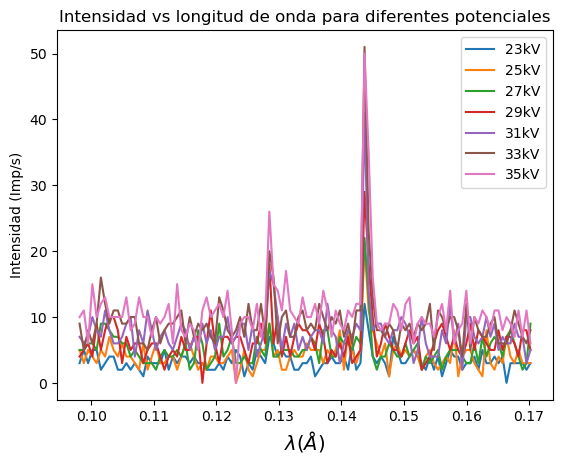

In [48]:
N_filas, N_columnas = valores.shape

for i in range(N_columnas):
    plt.plot(angulos, valores.iloc[:, i], label=f'{co[i]}kV')  # Se usa .iloc[] para acceder a columnas
    plt.title("Intensidad vs longitud de onda para diferentes potenciales")
    plt.xlabel("$\\lambda (Å)$", size=14)
    plt.ylabel('Intensidad (Imp/s)')
    plt.legend()
plt.show()

In [30]:
def linear_model(x,m,c):
      return m*x + c

In [33]:
def lineal_reg(x,y):
    val_opt,matriz_cov= curve_fit(linear_model, x, y)
    m, c = val_opt
    var_diag= np.sqrt(np.diag(matriz_cov))  # Errores en los parámetros ajustados
    m_err, c_err = var_diag
    return (m,m_err),(c,c_err)

In [49]:
m,merr, c, cerr

(11.520228058021848,
 1.3009703093164944,
 6.7163599410418415,
 0.046196472670296335)

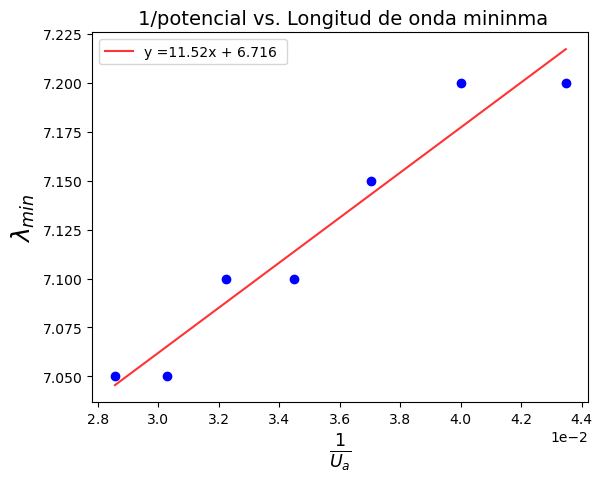

In [46]:
fig,ax= plt.subplots()
lamdas_minimos=np.array([0.141,0.141,0.142,0.142,0.143,0.144,0.144])*50
array_voltaje=np.array([23,25,27,29,31,33,35])


(m,merr),(c,cerr)=lineal_reg(1/array_voltaje[::-1],lamdas_minimos)
mm_reg=np.linspace(min(1/array_voltaje[::-1]),max(1/array_voltaje[::-1]),100)
ax.plot(mm_reg,linear_model(mm_reg,m,c),alpha=.8,c="r",label=f"y ={round(m,3)}x + {round(c,3)} ")
ax.scatter(1/array_voltaje[::-1],lamdas_minimos,color="b")
ax.set_xlabel(r"$\frac{1}{U_a}$",size=18)
ax.set_ylabel(r"$\lambda_{min}$",size=18)
ax.set_title(" 1/potencial vs. Longitud de onda mininma",size=14)
ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax.legend()

#Residuales


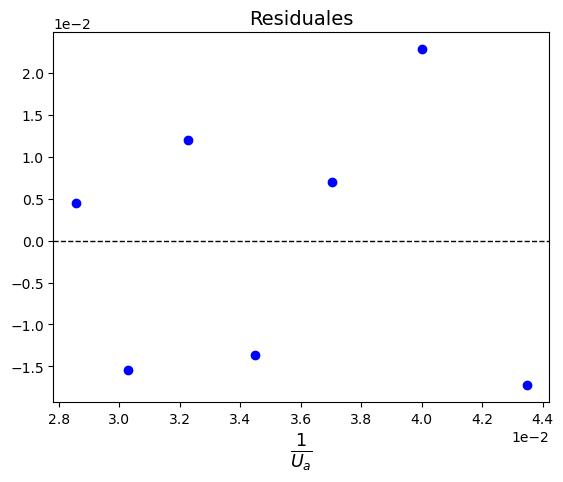

In [47]:
fig,ax= plt.subplots()
y_real=lamdas_minimos
y_pred=linear_model(1/array_voltaje[::-1],m,c)
residual=y_real-y_pred
ax.scatter(1/array_voltaje[::-1],residual,color="b")
ax.set_title("Residuales",size=14)
ax.set_xlabel(r"$\frac{1}{U_a}$",size=18)
ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax.axhline(0, color='black', linewidth=1, linestyle='--')